In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation

In [3]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

# Train data shape
print(xtrain.shape)
print(ytrain.shape)

# Test data shape
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


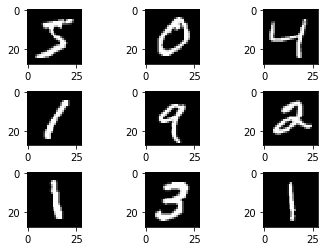

In [4]:
# Plot Data
fig = plt.figure()
fig.subplots_adjust(hspace=0.5)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(xtrain[i], cmap='gray')
plt.show()

In [5]:
# Parametets
input_dim = 784   #(img shape: 28*28)
hid1_dim = 512
hid2_dim = 512
hid3_dim = 100
output_dim = 10

In [6]:
# Reshape
xtrain = (xtrain.reshape(60000, input_dim)).astype('float32')
xtest = (xtest.reshape(10000, input_dim)).astype('float32')

# Normalization
xtrain /= 255
xtest /= 255

print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


In [7]:
ytrain = np_utils.to_categorical(ytrain, output_dim)
ytest = np_utils.to_categorical(ytest, output_dim)

print(ytrain.shape)
print(ytest.shape)

(60000, 10)
(10000, 10)


In [8]:
# Model 
model = Sequential()

model.add(Dense(hid1_dim, input_shape=(input_dim,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(hid2_dim))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(hid3_dim))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(output_dim))
model.add(Activation('softmax'))

#model.summary()

In [9]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [10]:
# Training
epochs = 5
batch = 128

history = model.fit(xtrain, ytrain, batch_size=batch, epochs=epochs, verbose=2, validation_data=(xtest, ytest))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 6s - loss: 0.2803 - accuracy: 0.9161 - val_loss: 0.1153 - val_accuracy: 0.9646
Epoch 2/5
 - 6s - loss: 0.1171 - accuracy: 0.9649 - val_loss: 0.1017 - val_accuracy: 0.9690
Epoch 3/5
 - 6s - loss: 0.0844 - accuracy: 0.9743 - val_loss: 0.0751 - val_accuracy: 0.9781
Epoch 4/5
 - 6s - loss: 0.0687 - accuracy: 0.9794 - val_loss: 0.0730 - val_accuracy: 0.9786
Epoch 5/5
 - 7s - loss: 0.0588 - accuracy: 0.9818 - val_loss: 0.0686 - val_accuracy: 0.9809


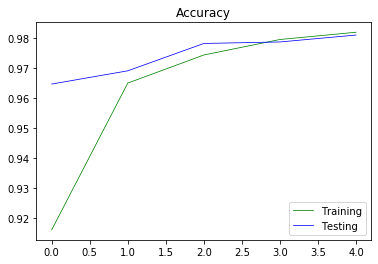

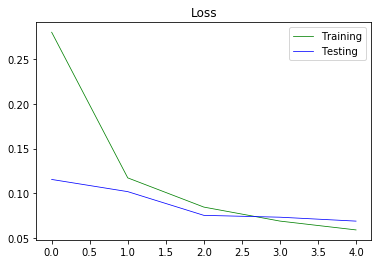

In [13]:
plt.plot(history.history['accuracy'], color='green', linewidth=0.75, label='Training')
plt.plot(history.history['val_accuracy'], color='blue', linewidth=0.75, label='Testing')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.show()

plt.plot(history.history['loss'], color='green', linewidth=0.75, label='Training')
plt.plot(history.history['val_loss'], color='blue', linewidth=0.75, label='Testing')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()